In [56]:
import os
import pandas as pd
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats.stats import pearsonr   
from scipy import stats
from sklearn.metrics import r2_score
from collections import Counter
import pickle
from scipy import spatial, stats
from scipy.stats import kurtosis, skew
import operator

<H2> PROCESSING THE STUDY DATA </H2>

In [30]:
results_df = pd.DataFrame()
results = defaultdict(list)

for filename in os.listdir('experiments'):
    with open('experiments/'+filename, 'r') as file:
        movie_list = file.readline()
        pre_results = file.readlines()
        for line in pre_results:
            line = line.strip('\n')
            line = line.split(",")
            results[line[0]].append(line[1:]) 
            df1 = pd.DataFrame(line[0:5])
            df1 = df1.transpose()
            results_df = results_df.append(df1)
            
results_df = results_df.sort_values(0)
results_df.columns=['m_id', 'seen', 'P1', 'P2', 'P3']
results_df["P1"] = results_df["P1"].astype('category')
results_df["P1"] = results_df["P1"].cat.codes
results_df["P2"] = results_df["P2"].astype('category')
results_df["P2"] = results_df["P2"].cat.codes
results_df["P3"] = results_df["P3"].astype('category')
results_df["P3"] = results_df["P3"].cat.codes
#results_df = results_df.apply(preprocessing.LabelEncoder().fit_transform)

In [3]:
for key in results:
    for r in results[key]:
        print(r[:4])#+r[-9:])
    print('----')

[' No', ' Somewhat Agree', " Don't Agree", " Don't Agree"]
[' Yes', ' Somewhat Agree', " Don't Agree", " Don't Agree"]
[' Yes', ' Somewhat Agree', ' Somewhat Agree', ' Somewhat Agree']
[' Yes', ' Totally Agree', ' Totally Agree', ' Totally Agree']
[' Yes', ' Totally Agree', " Don't Agree", ' Somewhat Agree']
----
[' Yes', " Don't Agree", ' Somewhat Agree', ' Totally Agree']
[' Yes', " Don't Agree", " Don't Agree", ' Somewhat Agree']
[' No', ' Somewhat Agree', " Don't Agree", ' Totally Agree']
[' No', ' Somewhat Agree', ' Totally Agree', ' Totally Agree']
[' No', " Don't Agree", ' Somewhat Agree', ' Somewhat Agree']
[' Yes', ' Totally Agree', ' Totally Agree', ' Totally Agree']
----
[' No', ' Somewhat Agree', " Don't Agree", " Don't Agree"]
[' No', ' Somewhat Agree', " Don't Agree", " Don't Agree"]
[' No', ' Totally Agree', " Don't Agree", " Don't Agree"]
[' No', ' Totally Agree', ' Somewhat Agree', ' Totally Agree']
[' No', ' Totally Agree', ' Somewhat Agree', " Don't Agree"]
[' No', '

In [4]:
for x in results_df.m_id.unique():
    print(results_df.loc[results_df['m_id'] == x])

         m_id  seen  P1  P2  P3
0  0780628799   Yes   1   1   0
0  0780628799    No   2   1   0
0  0780628799   Yes   0   1   2
0  0780628799   Yes   0   2   0
0  0780628799    No   1   2   0
0  0780628799   Yes   1   0   1
         m_id  seen  P1  P2  P3
0  0792842499    No   1   0   0
0  0792842499   Yes   1   1   1
0  0792842499   Yes   2   0   1
0  0792842499   Yes   1   0   0
0  0792842499   Yes   2   2   2
         m_id  seen  P1  P2  P3
0  6303149200   Yes   2   2   2
         m_id  seen  P1  P2  P3
0  6304089767   Yes   2   1   0
0  6304089767   Yes   2   2   1
0  6304089767   Yes   2   2   1
         m_id  seen  P1  P2  P3
0  6304500831   Yes   2   1   1
0  6304500831    No   2   1   2
0  6304500831   Yes   2   1   1
0  6304500831   Yes   2   2   2
0  6304500831    No   1   0   1
         m_id  seen  P1  P2  P3
0  6305229449   Yes   0   1   0
0  6305229449   Yes   2   1   0
0  6305229449   Yes   1   2   0
0  6305229449    No   2   0   2
         m_id  seen  P1  P2  P3
0  63059

In [31]:
summary = results_df.groupby(['m_id'])['P1','P2','P3'].mean()
summary = summary.round(1)
members = results_df.groupby(['m_id']).size()
summary = pd.concat([summary, members], axis=1)
summary.columns=['P1', 'P2', 'P3', 'members']
summary = summary[members > 3]
summary

,P1,P2,P3,members
m_id,,,,
0780628799,0.8,1.2,0.5,6
0792842499,1.4,0.6,0.8,5
6304500831,1.8,1.0,1.4,5
6305229449,1.2,1.0,0.5,4
B00003CXQX,0.7,1.0,1.7,6
B00004TJTQ,1.5,0.3,0.7,6
B00004ZEU5,0.7,0.5,0.5,6


In [101]:
summary = results_df.groupby(['m_id'])['P1','P2','P3'].median()
summary = summary.round(2)
members = results_df.groupby(['m_id']).size()
summary = pd.concat([summary, members], axis=1)
summary.columns=['P1', 'P2', 'P3', 'members']
summary = summary[members > 3]
summary

,P1,P2,P3,members
m_id,,,,
0780628799,1.0,1.0,0.0,7
0792842499,1.0,0.0,1.0,5
6304500831,2.0,1.0,1.5,6
6305229449,2.0,1.0,0.0,5
B00003CXQX,1.0,1.0,2.0,7
B00004TJTQ,1.0,0.0,0.0,7
B00004ZEU5,1.0,0.0,0.0,7


<H3> COMPARISON RATING MEAN VS. COSINE VALUES </H3>

In [97]:
user_ratings = []
p1 = summary['P1'].tolist()
p2 = summary['P2'].tolist()
p3 = summary['P3'].tolist()
for x in range(len(p1)):
    user_ratings.append(p1[x])
    user_ratings.append(p2[x])
    user_ratings.append(p3[x])

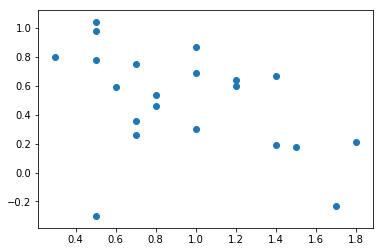

(-0.44536252677491761, 0.043048142764683738)


In [65]:
# 10 vs 30 std over 3 revs
cos_data = [0.45999999999999996, 0.6400000000000001, -0.29999999999999993, 0.1899999999999999, 0.5899999999999999, 0.5399999999999995, 0.21000000000000013, 0.29999999999999993, 0.6700000000000002, 0.5999999999999999, 0.6900000000000002, 0.98, 0.2599999999999998, 0.8699999999999999, -0.22999999999999998, 0.1800000000000003, 0.8, 0.36000000000000026, 0.75, 0.7799999999999998, 1.04]
plt.scatter(user_ratings, cos_data)
plt.show()
print(pearsonr(user_ratings, cos_data))

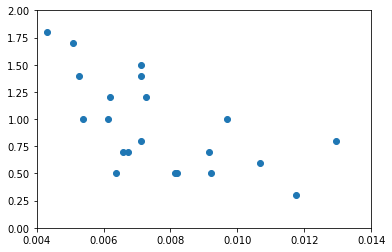

(-0.61137469953009682, 0.0032327727276191716)


In [66]:
# mean - median of 105 values
cos_data = [0.0071246700028546606, 0.0061931540912834038, 0.0081384484075598396, 0.0071202753095864768, 0.010685758420082236, 0.012928734600593517, 0.0043144551702911649, 0.0096797810427655673, 0.0052798195438784612, 0.0072540879989390072, 0.0061457816097699736, 0.0063625883952562745, 0.0067281658894987606, 0.0053741758453224042, 0.0050848624906146833, 0.0071080174878870306, 0.011741066878848794, 0.0091363537201030742, 0.0065921351850474208, 0.0092202898036551351, 0.0081926374742061769]
plt.scatter(cos_data, user_ratings)
plt.axis([0.004, 0.014, 0, 2])
plt.show()
print(pearsonr(user_ratings, cos_data))

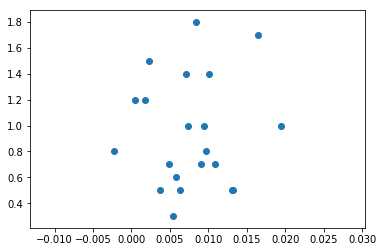

(0.061771674856587105, 0.79024412197574467)


In [67]:
# mean - median of 105 values
cos_data = [0.0096493552744576494, 0.0017530326556812748, 0.0062693123084101021, 0.010052778099442272, 0.0058274793706347694, -0.0022213508143136274, 0.0084134207316067799, 0.0094300027974574818, 0.007144212191521504, 0.00042950955655207679, 0.01940711403025619, 0.013252690609722562, 0.0048314884985088957, 0.0074004289566915737, 0.016386041820000141, 0.0023010433160096655, 0.005383809549274754, 0.010855903636684761, 0.0090409182762932749, 0.013100438181441965, 0.0036890407957084759]
plt.scatter(cos_data, user_ratings)
#plt.axis([0.004, 0.014, 0, 2])
plt.show()
print(pearsonr(user_ratings, cos_data))

In [52]:
with open("data/movie2vec_perspectives.pickle", "rb") as input_file:
    movie2vec_perspectives = pickle.load(input_file)

In [150]:
mov = ['0780628799','0792842499','6304500831','6305229449','B00003CXQX','B00004TJTQ','B00004ZEU5'] 
#mov = ['0792842499'] 

experiments = [10, 25, 50, 100, 250, 500, 1000, 2500, 5000]

experiments = [105, 110] 

#experiments = [6000]

for set_size in experiments:

    cos_data = []
    for moviex in mov:
        start_movie = moviex
        start = (start_movie, movie2vec_perspectives[start_movie])
        selected = start_movie
        discarded = []

        u_index = {}
        display = []
        discarded.append(start_movie)
        topcosines_small = {}
        topcosines_large = {}

        for base in movie2vec_perspectives[selected]:
            v1 = base[2:102]
            cosine = {}
            for key in movie2vec_perspectives:
                if key not in discarded:
                    for perspective in movie2vec_perspectives[key]:
                        v2 = perspective[2:102]
                        v1v2 = str(perspective[0])
                        cosine[v1v2] = 1 - spatial.distance.cosine(v1, v2)
            sorted_cosine = sorted(cosine.items(), key=operator.itemgetter(1), reverse=True) 
            topk_cosine = sorted_cosine[:15]
            topcosines_large[base[0]] = (sorted_cosine[0:set_size])
            topcosines_small[base[0]] = (sorted_cosine[0:set_size])
            
        std_small = []
        for cos in topcosines_small:
            val = []
            for x in topcosines_small[cos]:
                val.append(x[1])

            std_small.append(3*(np.average(val)-np.median(val))/np.std(val))

        std_large = []
        for cos in topcosines_large:
            val = []
            for x in topcosines_large[cos]:
                val.append(x[1])

            std_large.append(3*(np.average(val)-np.median(val))/np.std(val))

        for x in std_large:
            cos_data.append(x)
            
#         for x in range(len(std_large)):
#             cos_data.append(std_small[x]-std_large[x])

    print(set_size, pearsonr(cos_data, user_ratings))
    print(cos_data)

105 (-0.72612560757537092, 0.00019397478756947404)
[0.85474761014770151, 0.74875010822461319, 1.0202118056924279, 0.59409495910059817, 0.73189383595544, 0.97383602264520452, 0.30447966946752059, 0.97603371706184261, 0.54193338518287693, 0.69590287659289252, 0.70356000419591624, 0.69847415571510685, 1.0022218203321995, 0.78332957226422961, 0.5531647137960285, 0.78874072407642148, 0.99568034167299579, 0.89986529184740105, 0.65628196830532526, 0.96372801082208726, 0.79343671050384201]
110 (-0.59258561225844819, 0.004643900803495216)
[0.82782717538916328, 0.86426886215020926, 0.9016858671050646, 0.49732854378634522, 0.77924641026463193, 0.90559222263145334, 0.42562375333422059, 0.91629395709319639, 0.60497533735435971, 0.73012649984974032, 0.71197960804224059, 0.80396542846213503, 0.89196126113536056, 0.82222911697291745, 0.83360518204593348, 0.79615504771480172, 0.90418816366273935, 0.96245125677090548, 0.72202680278705478, 1.0619209861196761, 0.70879509018763809]


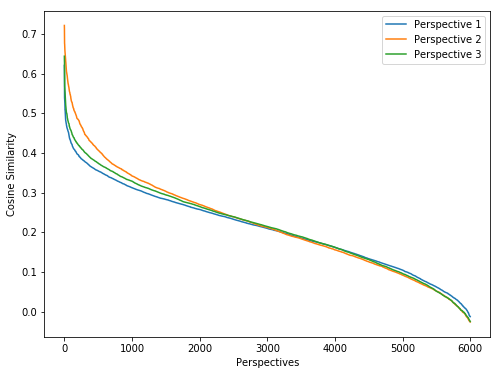

In [148]:
fig = plt.figure(figsize=(8,6))
p = 1

for cos in topcosines_large:
    val = []
    for x in topcosines_large[cos]:
        val.append(x[1])
        
    y = []
    for v in val:
        y.append(val.index(v))
           
    plt.plot(y, val, label = 'Perspective %s' %(p))
    plt.ylabel('Cosine Similarity')
    plt.xlabel('Perspectives')
    plt.legend()
    p = p + 1
    
plt.show()
fig.savefig('distribution.pdf',  bbox_inches='tight')

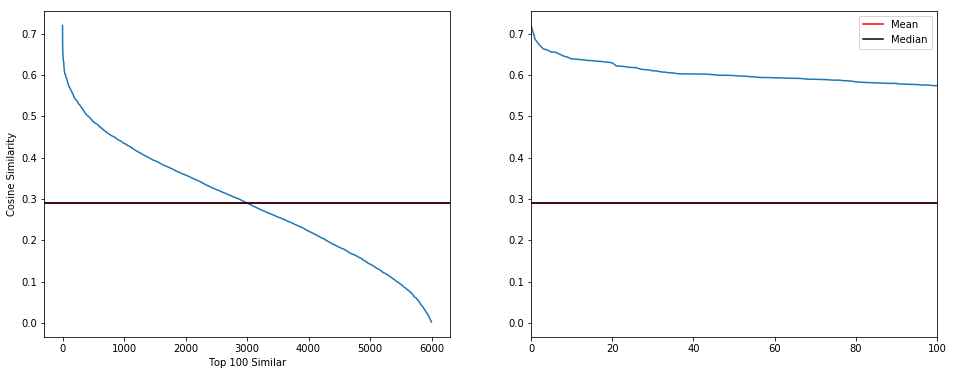

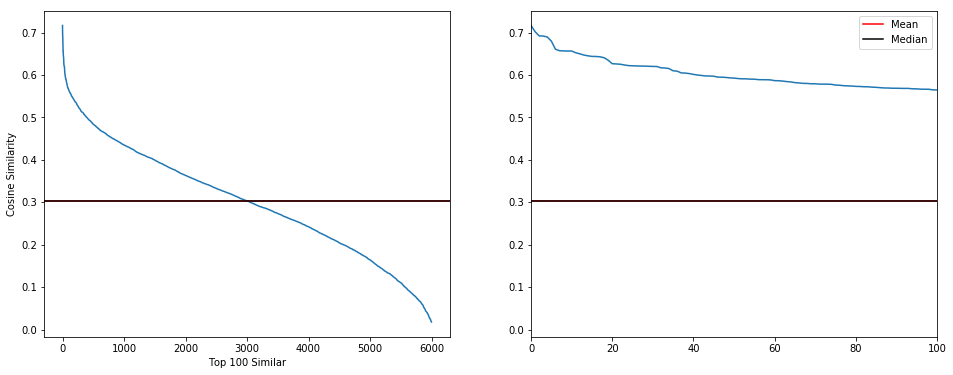

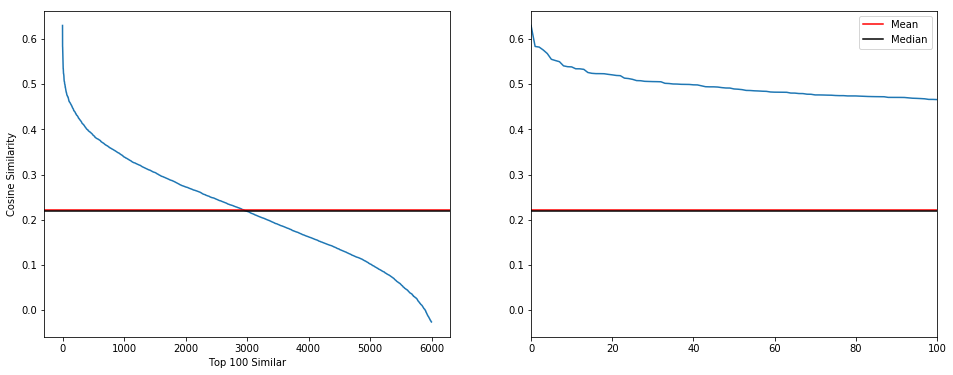

In [119]:
for cos in topcosines_large:
    val = []
    for x in topcosines_large[cos]:
        val.append(x[1])
        
    y = []
    for v in val:
        y.append(val.index(v))

    fig = plt.figure(figsize=(16,6))
    ax1 = fig.add_subplot(121)
    ax1.plot(y, val)
    ax1.axhline(np.mean(val), c='red', label='Mean')
    ax1.axhline(np.median(val), c='black', label='Median')
    plt.ylabel('Cosine Similarity')
    plt.xlabel('Top 100 Similar')
    #ax1.set_ylim([(np.mean(val)-0.05), (np.mean(val)+0.05)])
   # ax1.set_ylim([0, 0.75])
    
    val = []
    for x in topcosines_small[cos]:
        val.append(x[1])
        
    y = []
    for v in val:
        y.append(val.index(v))
        
    ax2 = fig.add_subplot(122)
    ax2.plot(y, val)
    ax2.axhline(np.mean(val), c='red', label='Mean')
    ax2.axhline(np.median(val), c='black', label='Median')
    #ax2.set_ylim([(np.mean(val)-0.05), (np.mean(val)+0.05)])
    ax2.set_xlim([0, 100])
    #print(np.mean(val)-np.median(val))
    plt.legend()
    plt.show()

<H3> MODELLING A FUNCTION </H3> 

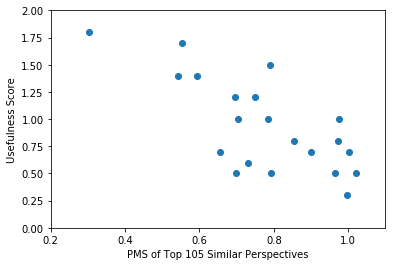

0.527258397977


In [180]:
cos_data = [0.85474761014770151, 0.74875010822461319, 1.0202118056924279, 0.59409495910059817, 0.73189383595544, 0.97383602264520452, 0.30447966946752059, 0.97603371706184261, 0.54193338518287693, 0.69590287659289252, 0.70356000419591624, 0.69847415571510685, 1.0022218203321995, 0.78332957226422961, 0.5531647137960285, 0.78874072407642148, 0.99568034167299579, 0.89986529184740105, 0.65628196830532526, 0.96372801082208726, 0.79343671050384201]

slope, intercept, r_value, p_value, std_err = stats.linregress(cos_data, user_ratings)
stats.linregress(cos_data, user_ratings)

def predict(x):
    line = []
    for value in x:
        v2 = value * slope + intercept
        line.append(v2)
    return(line)

fitLine = predict(user_ratings)
plt.scatter(cos_data, user_ratings)
#plt.plot(user_ratings, fitLine, c='r')
plt.axis([0.2, 1.1, 0, 2])
plt.ylabel('Usefulness Score')
plt.xlabel('PMS of Top 105 Similar Perspectives')
plt.show()
print(r_value ** 2)

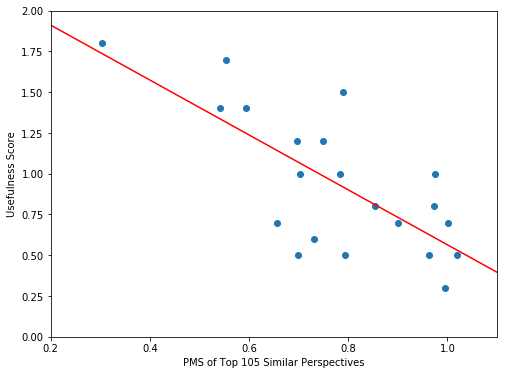

0.527258397977


In [191]:
x = np.array(cos_data)
y = np.array(user_ratings)
p4 = np.poly1d(np.polyfit(x, y, 1))

xp = np.linspace(0.000, 1.1, 100)

fig = plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.axis([0.2, 1.1, 0, 2])
plt.ylabel('Usefulness Score')
plt.xlabel('PMS of Top 105 Similar Perspectives')
plt.show()
fig.savefig('correlation.pdf',  bbox_inches='tight')

r2 = r2_score(y, p4(x))
print(r2)

In [198]:
fx = np.poly1d([-1.68396427,  2.24835985])
for x in cos_data:
    print(x, fx(x)/20)

0.8547476101477015 0.0404497707322
0.7487501082246132 0.0493745710296
1.0202118056924279 0.0265179810691
0.5940949591005982 0.0623962582944
0.73189383595544 0.0507938390409
0.9738360226452045 0.0304227391513
0.3044796694675206 0.0867813482838
0.9760337170618426 0.0302376972076
0.5419333851828769 0.0667881696316
0.6959028765928925 0.0538242135214
0.7035600041959162 0.0531794970567
0.6984741557151068 0.0536077164129
1.0022218203321995 0.0280327056973
0.7833295722642296 0.0464630419336
0.5531647137960285 0.0658425118271
0.7887407240764215 0.0460074326181
0.9956803416729958 0.0285834865141
0.899865291847401 0.0366509425358
0.6562819683053253 0.0571602232164
0.9637280108220873 0.0312738156889
0.793436710503842 0.0456120389503


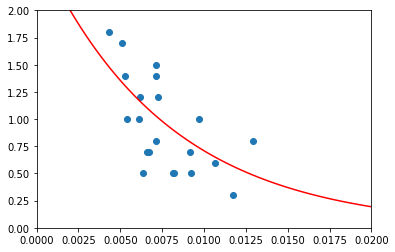

0.417731833456


In [179]:
x = np.array(std_list2)
y = np.array(std_list)
p4 = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))

xp = np.linspace(0.000, 0.02, 100)
plt.scatter(x, y)
yp = np.exp(p4[1])*np.exp(p4[0]*xp)
plt.plot(xp, yp, c='r')
plt.axis([0.00, 0.02, 0, 2])
plt.ylabel('Usefulness Score')
plt.xlabel('PMS of Top 105 Similar Perspectives')
plt.show()
r2 = r2_score(y, np.exp(p4[1])*np.exp(p4[0]*x))
print(r2)

In [26]:
results_df = pd.DataFrame()
results = defaultdict(list)

for filename in os.listdir('experiments'):
    with open('experiments/'+filename, 'r') as file:
        movie_list = file.readline()
        pre_results = file.readlines()
        for line in pre_results:
            line = line.strip('\n')
            line = line.split(",")
            results[line[0]].append(line[1:]) 
            df1 = pd.DataFrame(line[:2]+line[-9:])
            df1 = df1.transpose()
            results_df = results_df.append(df1)
            
results_df = results_df.sort_values(0)
results_df = results_df.set_index(results_df[0][0])
results_df = results_df.drop([0], axis = 1)
results_df.columns=[ 'seen', '1', '2', '3', '4', '5', '6', '7', '8', '9']
results_df = results_df.apply(preprocessing.LabelEncoder().fit_transform)
summary = results_df.groupby(results_df.index)[ '1', '2', '3', '4', '5', '6', '7', '8', '9'].mean()
summary = summary.round(1)
members = results_df.groupby(results_df.index).size()
summary = pd.concat([summary, members], axis=1)
summary.columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', 'members']
summary = summary[members > 3]
summary = summary.drop(['members'], axis = 1)
np.average(summary)
summary

,1,2,3,4,5,6,7,8,9
0,,,,,,,,,
0780628799,0.3,0.2,0.3,0.3,0.5,0.5,0.2,0.0,0.3
0792842499,0.8,1.0,0.2,0.0,0.0,0.2,0.4,0.6,0.6
6304500831,1.0,1.0,0.6,0.4,0.0,1.0,0.6,0.4,0.6
6305229449,0.2,0.5,1.0,0.0,0.5,0.2,0.2,0.2,0.0
B00003CXQX,0.2,0.0,0.2,0.7,0.2,0.0,0.5,0.8,0.5
B00004TJTQ,0.7,1.0,0.3,0.2,0.3,0.2,0.5,0.3,0.3
B00004ZEU5,0.3,0.0,0.5,0.3,0.2,0.3,0.7,0.0,0.7


In [25]:
i = 0
for x in summary.values:
    for y in x:
        if y > 0.49:
            print(y)
            i = i + 1
print(i)

0.5
0.5
0.8
1.0
0.6
0.6
1.0
1.0
0.6
1.0
0.6
0.6
0.7
0.5
0.8
0.5
0.7
1.0
0.5
0.5
0.7
0.7
22


In [129]:
results_df = pd.DataFrame()
results = defaultdict(list)

for filename in os.listdir('experiments'):
    with open('experiments/'+filename, 'r') as file:
        movie_list = file.readline()
        pre_results = file.readlines()
        for line in pre_results:
            line = line.strip('\n')
            line = line.split(",")
            results[line[0]].append(line[1:]) 
            df1 = pd.DataFrame(line[:1]+line[5:-9])
            df1 = df1.transpose()
            results_df = results_df.append(df1)
            
results_df = results_df.sort_values(0)
results_df = results_df.set_index(results_df[0][0])
results_df = results_df.drop([0], axis = 1)
#results_df = results_df.groupby(results_df.index)
results_df

,1,2,3
0,,,
0780628799,magical and touching movie,movie follows the book well,long but good
0780628799,fantastic touching movie,good acting story and rewatchable,good cast and worth the time
0780628799,,action style movie,all reviews give a small description of the m...
0780628799,great prision movie,good acting,
0780628799,movies with good acting,good plot with good acting,Movies where people have supernatural powers
0780628799,cast coparisson is good but not helpfull,the stories are completely diferent from the ...,I think that have only a little bit in commo...
0792842499,great western with great actor,original was better than blu-ray,looks sharp and good to watch again
0792842499,The best movie,,restoration
0792842499,western cowbow Clint Eastwood,blu-ray,blu-ray western
